In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy import stats

sns.set_style('whitegrid')

In [21]:
apps_df = pd.read_csv('googleplaystore.csv')
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [22]:
apps_df = apps_df[apps_df['Installs'] != 'Free']

In [23]:
apps_df.dropna(inplace=True)
apps_df.drop_duplicates(subset=['App'], keep='last', inplace=True)

In [24]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [32]:
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '', regex=False).str.replace(',', '').astype(int)
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False).astype(float)

AttributeError: Can only use .str accessor with string values!

In [30]:
apps_df = apps_df[apps_df['Category'] != '1.9']

In [31]:
print("DataFrame Info after Cleaning:")
print(apps_df.info())

DataFrame Info after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   float64
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB
None


In [33]:
print("\nFirst 5 rows of the cleaned DataFrame:")
print(apps_df.head())


First 5 rows of the cleaned DataFrame:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159   19M     10000  Free    0.0       Everyone   
2   87510  8.7M   5000000  Free    0.0       Everyone   
3  215644   25M  50000000  Free    0.0           Teen   
4     967  2.8M    100000  Free    0.0       Everyone   
5     167  5.6M     50000  Free    0.0       Everyone   

                    Genres     Last Updated         Current Ver   Android Ver  
0             Art & Design  January 7, 2018             

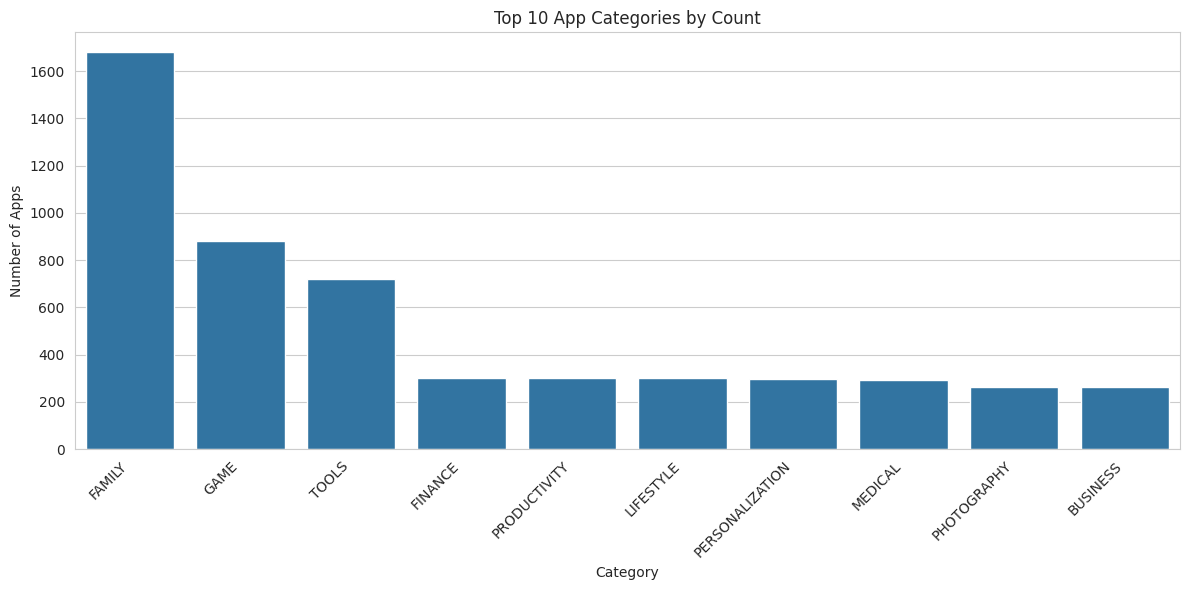

In [37]:
#Top ten categories
plt.figure(figsize=(12,6))
top_categories = apps_df['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 App Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

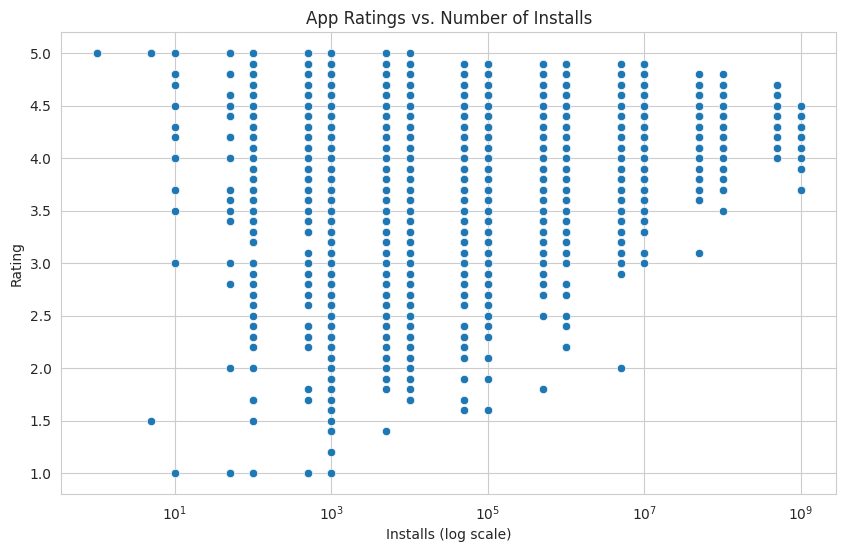

In [38]:
#App Ratings vs Number of Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=apps_df)
plt.title('App Ratings vs Number of Installs')
plt.xlabel('Installs (log scale)')
plt.xscale('log')
plt.ylabel('Rating')
plt.show()


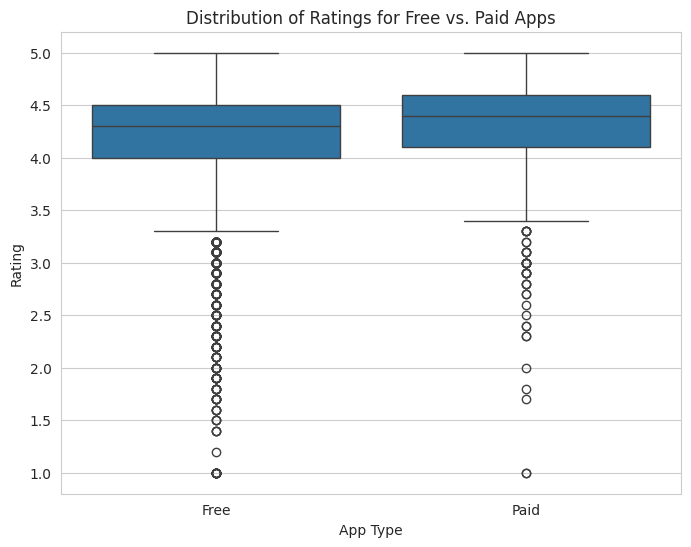

In [40]:
#Distribution of ratings for free vs paid apps
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Rating', data=apps_df)
plt.title('Distribution of Ratings for Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

In [48]:
#Sentiment Analysis
merged_df = pd.merge(apps_df, reviews_df, on= 'App', how= 'inner')
merged_df.dropna(subset=['Translated_Review'], inplace=True)

def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0
merged_df['sentiment_score'] = merged_df['Translated_Review'].apply(get_sentiment)

app_sentiment = merged_df.groupby('App')['sentiment_score'].mean().reset_index()

# Merge back with the main apps dataframe
final_df = pd.merge(apps_df, app_sentiment, on='App', how='inner')
print(final_df.head())

                                         App        Category  Rating Reviews  \
0                       Garden Coloring Book  ART_AND_DESIGN     4.4   13791   
1              FlipaClip - Cartoon animation  ART_AND_DESIGN     4.3  194216   
2  Boys Photo Editor - Six Pack & Men's Suit  ART_AND_DESIGN     4.1     654   
3              Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7   20260   
4                      Animated Photo Editor  ART_AND_DESIGN     4.1     203   

   Size  Installs  Type  Price Content Rating                   Genres  \
0   33M   1000000  Free    0.0       Everyone             Art & Design   
1   39M   5000000  Free    0.0       Everyone             Art & Design   
2   12M    100000  Free    0.0       Everyone             Art & Design   
3   25M    500000  Free    0.0       Everyone  Art & Design;Creativity   
4  6.1M    100000  Free    0.0       Everyone             Art & Design   

         Last Updated Current Ver   Android Ver  sentiment_score  
0  Sept

In [52]:
#Hypothesis Testing
free_apps = apps_df[apps_df['Type'] == 'Free']['Rating']
paid_apps = apps_df[apps_df['Type'] == 'Paid']['Rating']

t_stat, p_value = stats.ttest_ind(free_apps, paid_apps, equal_var=False)

alpha = 0.05
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print(" There is a significant difference in ratings between free and paid apps.")
else:
    print(" There is NO significant difference in ratings between free and paid apps.")

T-statistic: -4.08
P-value: 0.000
 There is a significant difference in ratings between free and paid apps.


In [53]:
final_df.to_csv('final_dataset.csv', index=False)